<h2>An introduction to using python to access Madrigal data (madrigalWeb)</h2>

#### This notebook available at https://github.mit.edu/pages/cariglia/pyhc_summer_school_2024/pyhc_demo.ipynb

To download the latest Python Madrigal API, go to http://cedar.openmadrigal.org/madrigalDownload/, or use pip:

<pre>pip install madrigalWeb</pre>

This module should work with either python 2 or python 3.

Then feel free to follow along with this talk!

Url of  Madrigal CEDAR database: http://cedar.openmadrigal.org

Online resources: <a href="http://cedar.openmadrigal.org/docs/name/rt_python.html">Tutorial</a> and <a href="http://http://cedar.openmadrigal.org/docs/name/rr_python.html">Reference</a>

Any questions: Email me (Katherine Cariglia) at <a href="mailto:cariglia@mit.edu">cariglia@mit.edu</a>

In [1]:
import madrigalWeb.madrigalWeb

The next command connects to one particular Madrigal site, and creates an object we will use for the rest of the session.

In [2]:
madDB = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org')

#### Data access and filtering methods
The top level of metadata at any site is the instruments it has available. This next method lists the available instruments, each of which is a MadrigalInstrument object.

In [3]:
instList = madDB.getAllInstruments()

MadrigalInstrument objects have the following attributes:

- name (string)
- code (int)
- mnemonic (3 char string)
- latitude (double)
- longitude (double)
- category (string)

Which can be used to search for instruments matching your criteria. 
For example, you can search for magnetometers in the Southern hemisphere with the following:

In [4]:
import numpy
instcat = numpy.asarray([x.category for x in instList])
instlat = numpy.asarray([x.latitude for x in instList])
maglist = numpy.argwhere((numpy.char.find(instcat, 'Magnetometer') > -1) & (instlat < 0))

print(instList[maglist[0][0]])

name: Jicamarca Magnetometer
code: 8250
mnemonic: jmt
latitude: -11.92
longitude: 283.13
altitude: 0.525
category: Magnetometers



Note that the code associated with the Jicamarca Magnetometer is 8250 (not related to its position in the list, which may change).  Also refered to as the kinst.  This will be used throughout the rest of the calls to refer to this instrument.

The next level of metadata at any site contains the experiments available for a given instrument, each of which is a MadrigalExperiment object. The next method lists the available experiments for the Jicamarca Magnetometer over the date range of March 2010:

In [5]:
exps = madDB.getExperiments(8250, 2010,3,1,0,0,0,2010,4,1,0,0,0)
print(exps[0])

id: 100261858
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100261858
url: http://cedar.openmadrigal.org/madtoc/experiments/2010/jmt/01mar10M
name: Jicamarca Magnetometer mode
siteid: 10
sitename: CEDAR
instcode: 8250
instname: Jicamarca Magnetometer
startyear: 2010
startmonth: 3
startday: 1
starthour: 0
startmin: 1
startsec: 0
endyear: 2010
endmonth: 3
endday: 23
endhour: 20
endmin: 56
endsec: 0
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Marco Milla
PIEmail: marco.milla@jro.igp.gob.pe
uttimestamp: 1670877880
access: 2
Madrigal version: 3.2



MadrigalExperiment objects have the following attributes:

- id (int)
- realUrl (string)
- url (string) 
- name (string)
- siteid (int)
- sitename (string)
- instcode (int)
- instname (string)
- startyear (int)
- startmonth (int)
- startday (int)
- starthour (int)
- startmin (int)
- startsec (int)
- endyear (int)
- endmonth (int)
- endday (int)
- endhour (int)
- endmin (int)
- endsec (int)
- isLocal (bool)
- madrigalUrl (string)
- pi (string)
- piEmail (string)
- uttimestamp (st_mtime)
- access (int)
- version (int)

Which can be used to filter the results returned from the call to getExperiments() in a similar manner as the call to getInstruments()-- perhaps by keyword in MadrigalExperiment.name. 

The next call gets all the files in that experiment, each of which is a MadrigalExperimentFile object.  An experiment may contain different types of data, as will be described in the kind of data description (kindatdesc):

In [6]:
files = madDB.getExperimentFiles(exps[0].id)
print(files[0])

name: /opt/cedar3/experiments/2010/jmt/01mar10M/jic20100301_mag.001.hdf5
kindat: 1700
kindatdesc: Jicamarca Magnetometers
category: 1
status: Jicamarca Magnetometer
permission: 0
expId: 100261858
doi: https://w3id.org/cedar?experiment_list=experiments/2010/jmt/01mar10M&file_list=jic20100301_mag.001.hdf5



MadrigalExperimentFile objects have the following attributes:

- name (string)
- kindat (int)
- kindatdesc (string)
- category (int)
- status (string)
- permission (int)
- expId (int)
- doi (string)

Which can be used to filter the results returned from the call to getExperimentFiles() in a similar manner as the call to getInstruments() and getExperiments()-- perhaps by keyword in MadrigalExperimentFile.kindatdesc. 

As a simple example, let's just download this data as is. 

Because Madrigal is not login controlled, logging is done by you passing in unverified identification information - your name, email, and affiliation.  Below I set up my personal info - <b>please change this to yours when you use this API!</b>

In [7]:
user_fullname = 'Student Example' 
user_email = 'pyhc@gmail.com' 
user_affiliation= 'PyHC Summer School 2024'

Now let's say I wanted to know what parameters were in this file.  You can get that from the API also:

In [8]:
madDB.downloadFile(files[0].name, '/tmp/test.hdf5', user_fullname, user_email, user_affiliation, format='hdf5')
parms = madDB.getExperimentFileParameters(files[0].name)
print(parms[45])

mnemonic: DUT21
description: Variation in UT (UT2 - UT1)
isError: 0
units: s
isMeasured: 0
category: Time Related Parameter
isSure: 1
isAddIncrement: -1



You can directly print the records in any file in a simple ascii format using simplePrint():

In [9]:
asciiData = madDB.simplePrint(files[0].name, user_fullname, user_email, user_affiliation)
print(asciiData[0:1000])

YEAR     MONTH       DAY      HOUR       MIN       SEC        YEAR       MONTH      DAY        HOUR       MIN        SEC        RECNO      KINDAT     KINST      UT1_UNIX   UT2_UNIX   GDLATR     GDLONR     GDLAT2     GLON2      BN         BE         BD         BMAG       BDEC       BINC       BH         BDH        HAV0LT_L   HAV0LT_R   
     2010         3         1         0         1        30          0       1700       8250 1267401660.000   1267401720.000   -1.19200e+01  -7.88700e+01      -5.18     -80.64   2.54690e-05  -2.65920e-07   3.36000e-07   2.54726e-05  -5.98200e-01   7.55800e-01   2.54704e-05           nan           nan           nan  
     2010         3         1         0         2        30          1       1700       8250 1267401720.000   1267401780.000   -1.19200e+01  -7.88700e+01      -5.18     -80.64   2.54685e-05  -2.66093e-07   3.35800e-07   2.54721e-05  -5.98600e-01   7.55300e-01   2.54699e-05   1.10000e-09   2.54670e-05   2.72911e-05  
     2010         3       

Or, you can download the file with only parameters you select, using filters to remove unwanted data.
A list of all valid CEDAR Madrigal parameters can be found at http://madrigal3.haystack.mit.edu/parameterMetadata/.  A description of how to write filter strings are at http://madrigal3.haystack.mit.edu/filterMetadata/ 

In this example, we choose the following parameters:

- YEAR
- MONTH
- DAY
- HOUR
- MIN
- SEC
- BN
- BE
- BD

The filter applied will limit BN to be between 2.5e-5 - 2.6e-5 teslas and BE to be greater than -2.7e-7 teslas. The filter string is then "filter=bn,.000025,.000026 filter=be,-.00000027,", where the blank in the BE filter denotes no upper limit.

In [10]:
filterStr = "filter=bn,.000025,.000026 filter=be,-.00000027,"
parms = "YEAR,MONTH,DAY,HOUR,MIN,SEC,BN,BE,BD"
result = madDB.isprint(files[0].name, parms, filterStr, user_fullname, user_email, user_affiliation)

In [11]:
lines = result.split('\n')
for line in lines[:5]:
    print(line)

     2010         3         1         0         1        30  2.54690e-05  -2.65920e-07   3.36000e-07  
     2010         3         1         0         2        30  2.54685e-05  -2.66093e-07   3.35800e-07  
     2010         3         1         0         3        30  2.54686e-05  -2.65516e-07   3.35800e-07  
     2010         3         1         0         4        30  2.54679e-05  -2.66665e-07   3.35800e-07  
     2010         3         1         0         5        30  2.54678e-05  -2.66263e-07   3.36400e-07  


#### Plotting with Madrigal data
After downloading a file, you can make simple timeseries plots with the following code.

First, extract the requested datasets (we will be plotting only the northward component of the geomagnetic field in this example):

In [12]:
import h5py
import datetime
import matplotlib.pyplot
h5File = h5py.File('/tmp/test.hdf5', 'r')
year = h5File["Data/Table Layout"]["year"]
month = h5File["Data/Table Layout"]["month"]
day = h5File["Data/Table Layout"]["day"]
hour = h5File["Data/Table Layout"]["hour"]
min = h5File["Data/Table Layout"]["min"]
sec = h5File["Data/Table Layout"]["sec"]
bn = h5File["Data/Table Layout"]["bn"]

Create a list of datetimes:

In [13]:
datetimes = []
for i in range(len(year)):
    currentDT = datetime.datetime(int(year[i]), int(month[i]), int(day[i]),
        int(hour[i]), int(min[i]), int(sec[i]))
    datetimes.append(currentDT)

Add some label formatting and then plot:

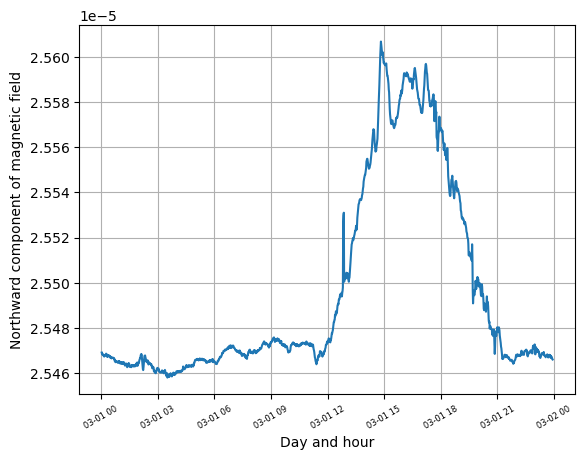

In [14]:
for label in matplotlib.pyplot.xticks()[1]:
    label.set(rotation=30, size=6)
matplotlib.pyplot.plot(datetimes, bn)
matplotlib.pyplot.xlabel("Day and hour")
matplotlib.pyplot.ylabel("Northward component of magnetic field")
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

#### Other tools available in the madrigalWeb API

##### madCalculator
madCalculator is a service that calculates the values of requested paramters for the given time in the given location range. Its input arguments are:

- year (int)
- month (int)
- day (int)
- hour (int)
- min (int)
- sec (int)
- startLat (float): start latitude in range -90 to 90
- endLat (float): end latitude in range -90 to 90
- stepLat (float): latitude step (0 - 90)
- startLong (float): start longitude in range -180 to 180
- endLong (float): end longitude in range -180 to 180
- stepLong (float): longitude step (0 - 180)
- startAlt (float): start altitude in km
- endAlt (float): end altitude in km
- stepAlt (float): altitude step 
- parms: comma delimited string of requested Madrigal parameters in the same format used in isprint
- oneDParmList (optional): a list of 1D parameters whose values should be set for calculation
- oneDParmValues (optional): a list of values associated with the 1D parameters specified in oneDParmList

The result is returned as a list of lists of doubles, where each list contains the input latitude, longitude, altitude, and each of the calculated values. If the value cannot be calculated, it will be set to nan.

We will be testing the madCalculator service with the following input parameters:
- datetime: 1999-02-15 12:30:00
- startLat: 45
- endLat: 55
- stepLat: 5
- startLon: -170
- endLonL -150
- stepLon: 10
- startAlt: 200
- endAlt: 200
- stepAlt: 0
- parameters: BMAG, BN

In [16]:
result = madDB.madCalculator(1999,2,15,12,30,0,45,55,5,-170,-150,10,200,200,0,'bmag,bn')
print(result)

[[45.0, -170.0, 200.0, 4.2414e-05, 1.97545e-05], [45.0, -160.0, 200.0, 4.32101e-05, 1.92452e-05], [50.0, -170.0, 200.0, 4.465e-05, 1.80439e-05], [50.0, -160.0, 200.0, 4.53996e-05, 1.7472e-05]]


##### traceMagneticField
traceMagneticField returns a point along a magnetic field line for each point specified by the lists alts, lats, lons. 
Traces to either: 
1. conjugate point 
2. intersection with a given altitude in the northern or southern hemisphere 
3. to the apex
4. to GSM XY plane, depending on qualifier argument. 

Uses Tsyganenko or IGRF fields, depending on model argument. Input arguments are either GSM or Geodetic, depending on inputType argument. Output arguments are either GSM or Geodetic, depending on outputType argument. 
The full list of input arguments is as follows:
- year (int)
- month (int)
- day (int)
- hour (int)
- min (int)
- sec (int)
- inputType: 0 for geodetic, 1 for GSM
- outputType: 0 for geodetic, 1 for GSM
The following parameters depend on inputType and must be the same length:
- alts: a list of geodetic altitudes or ZGSMs of starting point
- lats: a list of geodetic latitudes or XGSMs of starting point
- lons: a list of longitude or YGSM of starting point
- model: 0 for Tsyganenko, 1 for IGRF
- qualifier: 0 for conjugate, 1 for north_alt, 2 for south_alt, 3 for apex, 4 for GSM XY plane
- stopAlt (float): altitude in km to stop trace at, if qualifier is north_alt or south_alt. If other qualifier, this parameter is not required. Default is None, which will raise exception if qualifier is north_alt or south_alt

The result is returned as a tuple of tuples, one tuple for point in (alts, lats, lons) lists, where each tuple has 3 items:
- geodetic altitude or ZGSM of ending point
- geodetic latitude or XGSM of ending point
- geodetic longitude or YGSM of ending point


We will be testing the traceMagneticFIeld service with the following input arguments:
- datetime: 2010-03-01 00:01:30
- inputType: 0 (geodetic)
- outputType: 0 (geodetic)
- alts: [.525, 200]
- lats: [30.92, 30.92]
- lons: [-78.87, -78.87]
- model: 1 (IGRF)
- qualifier: 1 (north_alt)
- stopAlt: 1000

In [17]:
trace = madDB.traceMagneticField(2010, 3, 1, 0, 1, 30, 0, 0, [.525, 200], [30.92, 30.92],
                                 [-78.87, -78.87], 1, 1, 1000)
print(trace)

[(1000.0, -45.383779, -80.959112), (1000.0, -46.608476, -81.016383)]
